In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

## Data descriptions:
doi: 10.24432/C5002N
<br><br>AP (Ambient Pressure) Feature,	Continuous, (range 992.89-1033.30 milibar)	units:milibar
<br>RH	(Residual Humidity) Feature,	Continuous, (range 25.56% to 100.16%)	units:%
<br>AT	(Ambient Temperature) Feature,	Continuous,	(range 1.81°C and 37.11°C)	units: C
<br>V (Exhaust Vacuum)	Feature	Continuous (range 25.36-81.56 cm Hg)        	units: cm Hg
<br><br>PE	(Net hourly electrical output of the plant) Target,	Continuous,	(range 420.26-495.76 MW)	units:MW
 
<b><u>combined cycle power plant:</b></u>
<br>-electricity of the plant is generated by steam,gas turbines, and returned heat
<br>-the vacuum is colected from and has effect on the steam turbine
<br>-ambient variables affect gas turbine performance


## Project goal:
use environment features to predict net hourly electrical energy output of the plant (EP)

In [18]:
df = pd.read_csv('CombinedCyclePowerPlant.csv', sep=',')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


Text(0.5, 1.0, 'PE (target) hist')

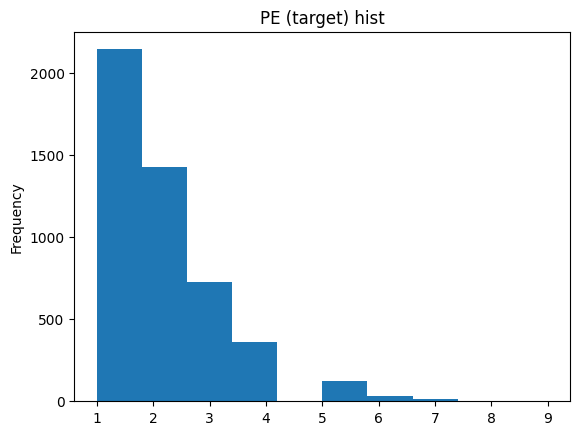

In [4]:
df['PE'].value_counts().plot(kind='hist')
plt.title('PE (target) hist')

Text(0.5, 1.0, 'AP hist')

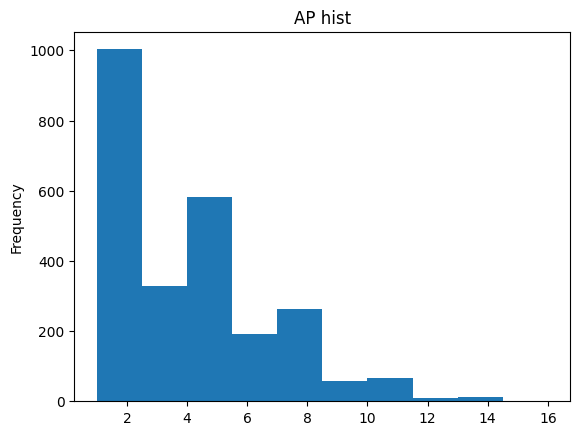

In [5]:
df['AP'].value_counts().plot(kind='hist')
plt.title('AP hist')

Text(0.5, 1.0, 'RH hist')

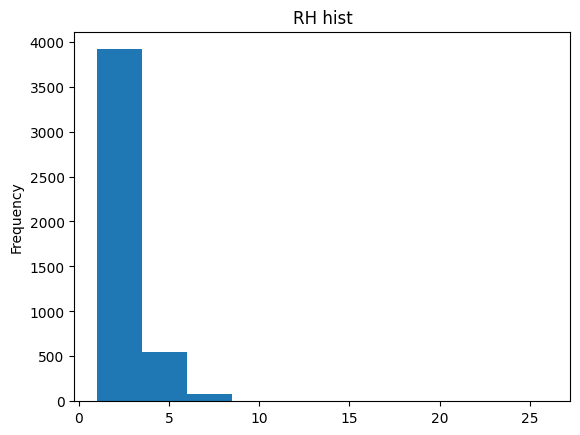

In [6]:
df['RH'].value_counts().plot(kind='hist')
plt.title('RH hist')

Text(0.5, 1.0, 'AT hist')

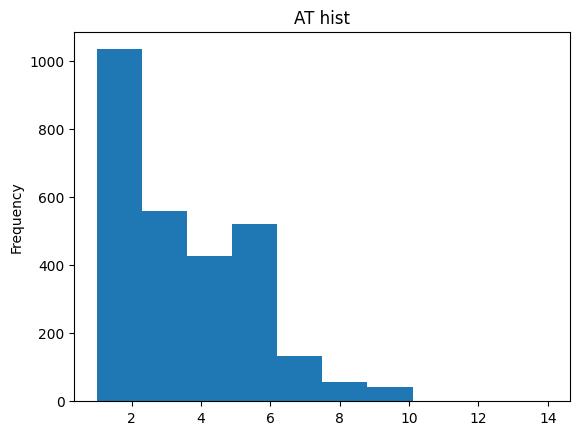

In [7]:
df['AT'].value_counts().plot(kind='hist')
plt.title('AT hist')

Text(0.5, 1.0, 'V hist')

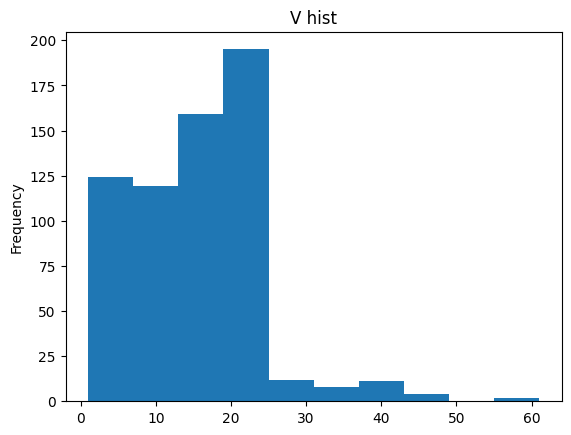

In [8]:
df['V'].value_counts().plot(kind='hist')
plt.title('V hist')

Text(0.5, 1.0, 'RH hist')

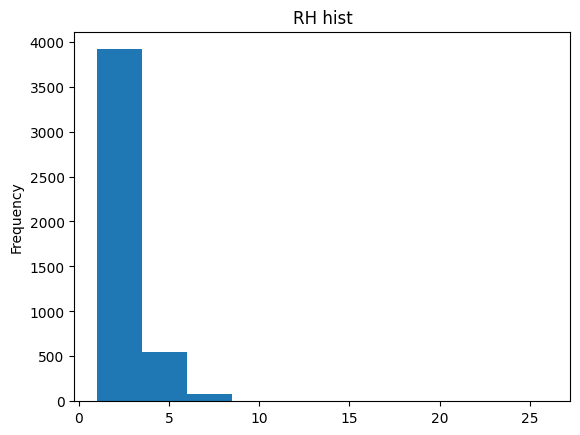

In [9]:
df['RH'].value_counts().plot(kind='hist')
plt.title('RH hist')

In [10]:
df.isnull().describe()

,AT,V,AP,RH,PE
count,9568,9568,9568,9568,9568
unique,1,1,1,1,1
top,False,False,False,False,False
freq,9568,9568,9568,9568,9568


In [11]:
import wolta
wolta.data_tools.col_types(df)

['float64', 'float64', 'float64', 'float64', 'float64']

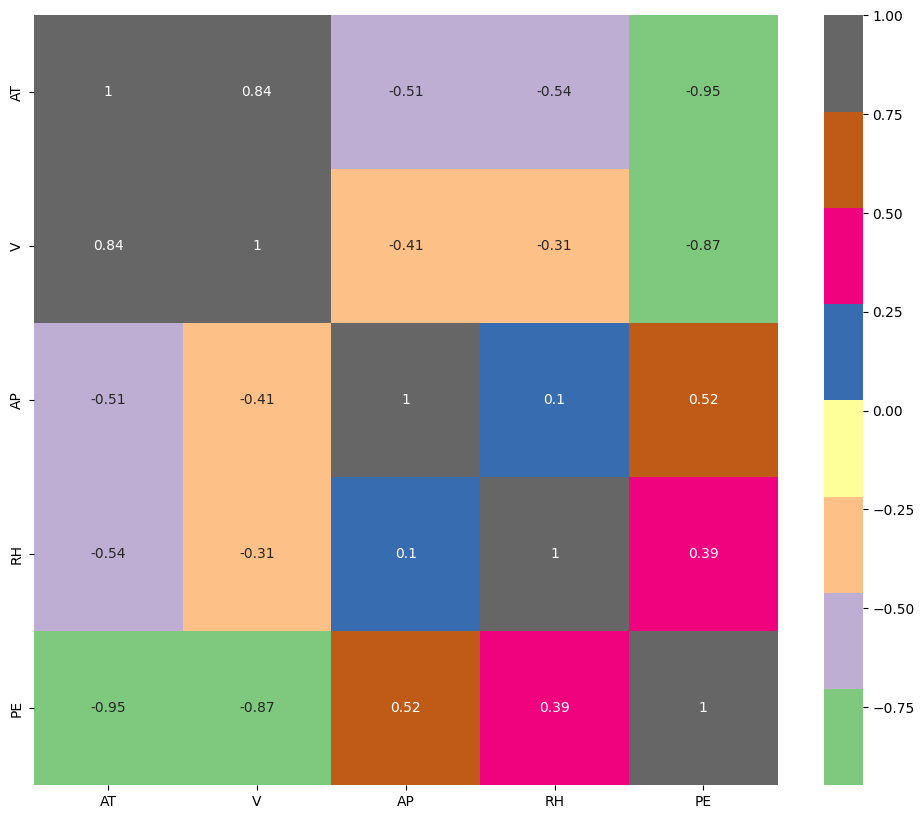

In [13]:
# pearson correlation
df.corr(method='pearson')
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

AP and PE: 0.52 (moderate corr)
<br>RH and PE: 0.39 (weark/moderate corr)
<br> V and PE: -0.87  (strong negative association to PE)
<br>AT and PE: -0.95 (strong negative association to PE)

## AP vs PE (corr = 0.52)

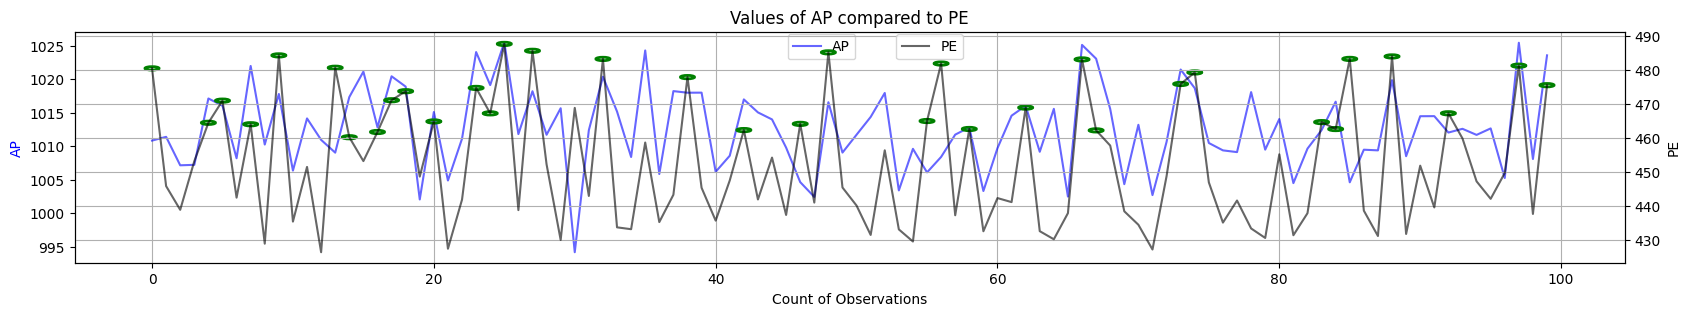

In [36]:
# Names
indep_name = 'AP'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.upper()} compared to {dep_name.upper()}')

# Plot Independent variable
plt.plot(indep, color='b', alpha=0.6)
ax1.set_ylabel(indep_name.upper(), color='b')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.46,0.88))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.upper(), color='black')
plt.legend([dep_name], loc=(0.53, 0.88))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 1000 and dep[i] > 460:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='green',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

## RH vs PE (corr = 0.39)

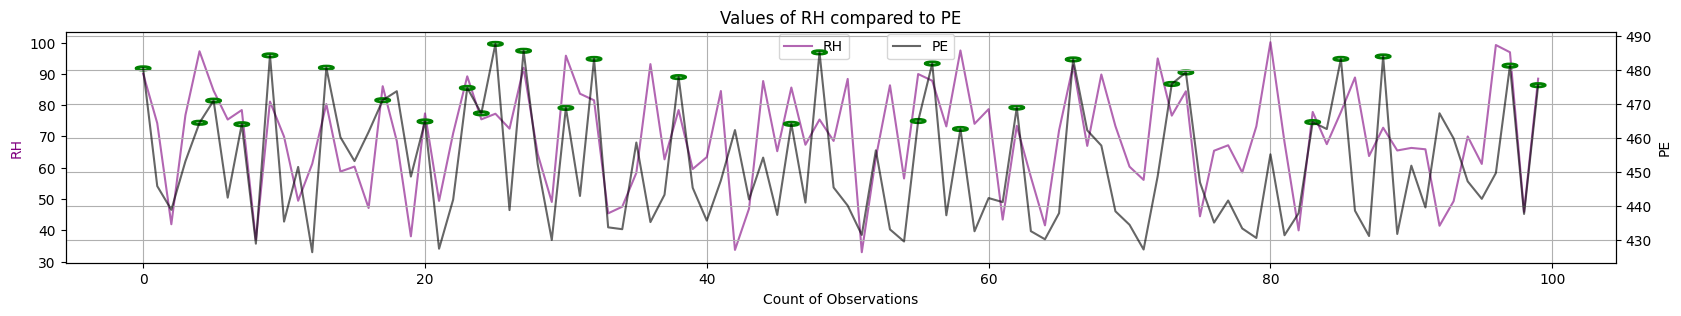

In [34]:
# Names
indep_name = 'RH'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.upper()} compared to {dep_name.upper()}')

# Plot Independent variable
plt.plot(indep, color='purple', alpha=0.6)
ax1.set_ylabel(indep_name.upper(), color='purple')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.46,0.88))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.upper(), color='black')
plt.legend([dep_name], loc=(0.53, 0.88))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 70 and dep[i] > 460:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='green',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

### AT vs PE (corr: -0.95, weak negative to no correlation )

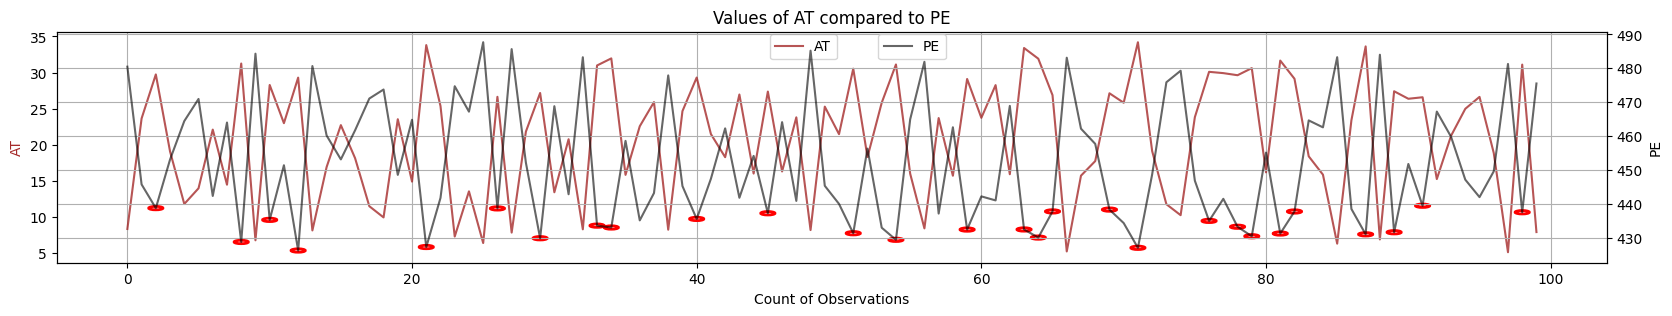

In [30]:
# Names
indep_name = 'AT'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.upper()} compared to {dep_name.upper()}')

# Plot Independent variable
plt.plot(indep, color='brown', alpha=0.8)
ax1.set_ylabel(indep_name.upper(), color='brown')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.46,0.88))


# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.upper(), color='black')
plt.legend([dep_name], loc=(0.53, 0.88))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 26 and dep[i] < 440:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='red',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

### V vs PE (corr -0.87, weak negative to no correlation )

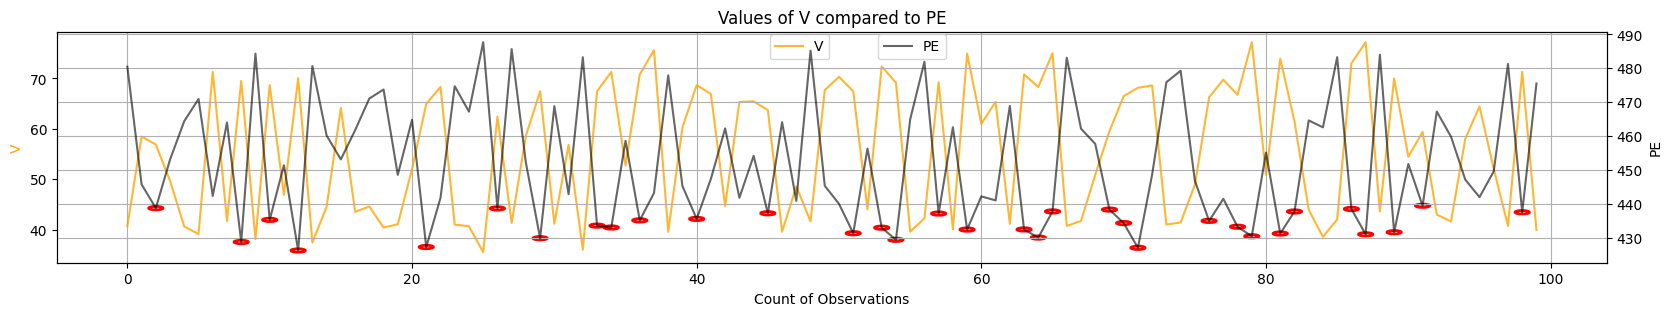

In [31]:
# Names
indep_name = 'V'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.upper()} compared to {dep_name.upper()}')

# Plot Independent variable
plt.plot(indep, color='orange', alpha=0.8)
ax1.set_ylabel(indep_name.upper(), color='orange')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.46,0.88))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.upper(), color='black')
plt.legend([dep_name], loc=(0.53, 0.88)) #hor, vert

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 40 and dep[i] < 440:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='red',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define your feature variables (AP, RH, AT, V)
X = df[['AP', 'RH', 'AT', 'V']]

# Add a constant for the intercept in the linear regression
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Feature           VIF
0   const  43761.151866
1      AP      1.452639
2      RH      1.705290
3      AT      5.977602
4       V      3.943003


C:\Users\DARiN\AppData\Local\Temp\ipykernel_21360\111766804.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif, palette='coolwarm')


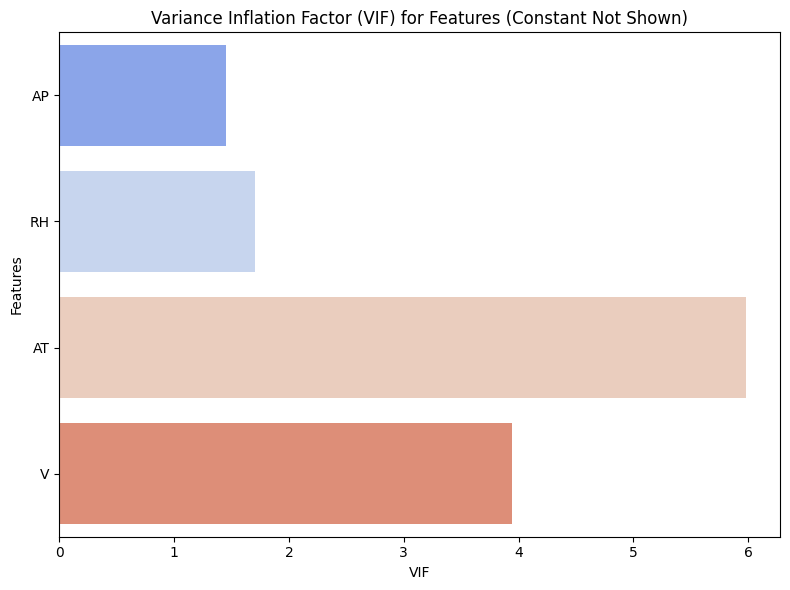

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Define your feature variables (AP, RH, AT, V)
X = df[['AP', 'RH', 'AT', 'V']]

# Add a constant for the intercept in the linear regression
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter out the constant from the DataFrame
vif = vif[vif["Feature"] != "const"]

# Plot VIF values as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='VIF', y='Feature', data=vif, palette='coolwarm')
plt.title("Variance Inflation Factor (VIF) for Features (Constant Not Shown)")
plt.xlabel("VIF")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Risk group (AT) VIF between 5 and 10: May indicate moderate multicollinearity. It’s worth checking, but it may not be a major concern unless it’s causing issues with model stability.

Unstable Coefficients: When features are highly correlated, it becomes difficult to isolate the individual effect of each predictor on the target variable. This leads to unstable and sensitive coefficients that can change drastically with small changes in the data.

Inflated Standard Errors: High collinearity increases the standard errors of the regression coefficients, which makes it harder to determine if predictors are statistically significant. This can lead to false conclusions about which features are important.

Overfitting: Multicollinearity can cause the model to overfit the data, as it may rely heavily on correlated predictors, leading to poor generalization to new, unseen data.

Reduced Interpretability: When predictors are highly correlated, it’s hard to determine which feature is truly driving the prediction. This reduces the interpretability of the model.

If any VIF values are greater than 10, it indicates high multicollinearity.

A value less than 5 suggests that the variable is not strongly correlated with the other predictors, so it's safe to keep in the model.

Between 5 and 10 Indicates moderate multicollinearity. It's not necessarily a problem, but you should carefully check the variables that have VIF in this range to ensure that multicollinearity isn't introducing significant issues into the model.

To check which variables AT (Ambient Temperature) shares collinearity with, you can calculate the correlation matrix and pairwise correlation coefficients between all variables in your dataset. This will show how strongly AT is correlated with other features.

In [49]:
# Correlation of AT with other variables
corr_at = correlation_matrix['AT']

# Display correlations
print("Correlation of AT with other variables:")
print(corr_at)

Correlation of AT with other variables:
AP   -0.507549
RH   -0.542535
AT    1.000000
V     0.844107
Name: AT, dtype: float64


Variance Inflation Factor (VIF): While correlation shows direct pairwise relationships, VIF can indicate collinearity by taking all other variables into account. To see how AT contributes to multicollinearity with others:

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the independent variables (features)
X = df[['AP', 'RH', 'AT', 'V']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

  Variable        VIF
0       AP  66.618618
1       RH  40.704756
2       AT  39.157705
3        V  74.969127


Correlation Matrix: The higher the correlation between AT and another variable (closer to ±1), the more likely they are collinear.

VIF: If you observe high VIF values (above 5 or 10) for variables other than AT, this indicates multicollinearity between those variables and AT.

Remove Highly Correlated Variables:

Identify and remove one or more variables that are highly correlated with others. You can base this decision on the correlation matrix or consider the importance of each variable to your analysis.

The ANOVA table will show the F-statistic and p-values for each main effect and interaction, allowing you to assess the significance of each factor and their combinations in predicting 'PE'.

Keep the significant variables and interactions such as RH, AT, V, AP
, AP
, AT
, and AP:RH:AT
.

low p and high F = good

#### The F-statistic in ANOVA tests the null hypothesis that all group means are equal.
#### The F-statistic is a ratio of the variance between group means to the variance within the groups, used to test whether there are significant differences between multiple groups.

C:\Users\DARiN\AppData\Local\Temp\ipykernel_24632\1424763578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_statistic', y='Factor', data=anova_results, palette='coolwarm')
posx and posy should be finite values
posx and posy should be finite values


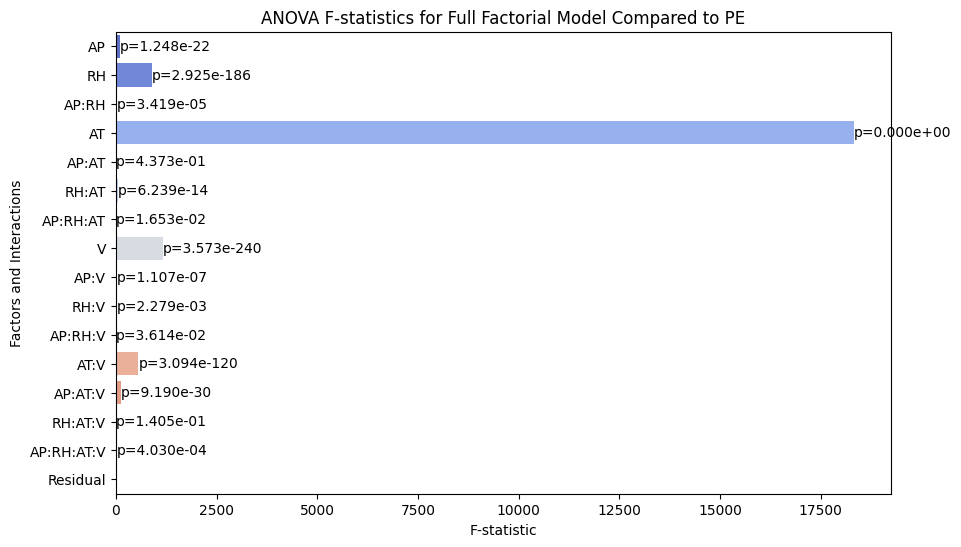

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns AP, RH, AT, V, and PE

# Fit the full factorial model
formula = 'PE ~ AP * RH * AT * V'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the F-statistic values and p-values
anova_results = anova_table[['F', 'PR(>F)']].reset_index()
anova_results.columns = ['Factor', 'F_statistic', 'p_value']

# Plot F-statistics with bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='F_statistic', y='Factor', data=anova_results, palette='coolwarm')

# Annotate each bar with its corresponding p-value
for i, row in anova_results.iterrows():
    plt.text(row.F_statistic + 0.1, i, f'p={row.p_value:.3e}', color='black', va='center')

# Add title and labels
plt.title("ANOVA F-statistics for Full Factorial Model Compared to PE")
plt.xlabel("F-statistic")
plt.ylabel("Factors and Interactions")
plt.show()

## The high F-statistic for AT suggests it explains much of the variance in the target variable (PE).
## However, other variables may still offer valuable explanatory power when considered together in the model, even if their individual F-statistics are lower.

F-statistic tells you the ratio of explained to unexplained variance.

Small F (near 1): Little evidence of difference between group means. This might indicate the factor or interaction has little impact on the target variable (in your case, PE).

Moderate F: Some difference between group means, but not extremely strong.

Large F: Strong evidence that group means differ, suggesting the factor/interaction significantly affects the target variable.

p-value shows the statistical significance of that result.

Low p-value (< 0.05): Indicates that the factor or interaction likely has a significant effect on the target variable (PE). You reject the null hypothesis, suggesting that the effect is real.

High p-value (> 0.05): Suggests that the factor or interaction does not have a statistically significant effect, and you fail to reject the null hypothesis.

C:\Users\DARiN\AppData\Local\Temp\ipykernel_21360\3007579474.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_statistic', y='Factor', data=anova_results, palette='cool')


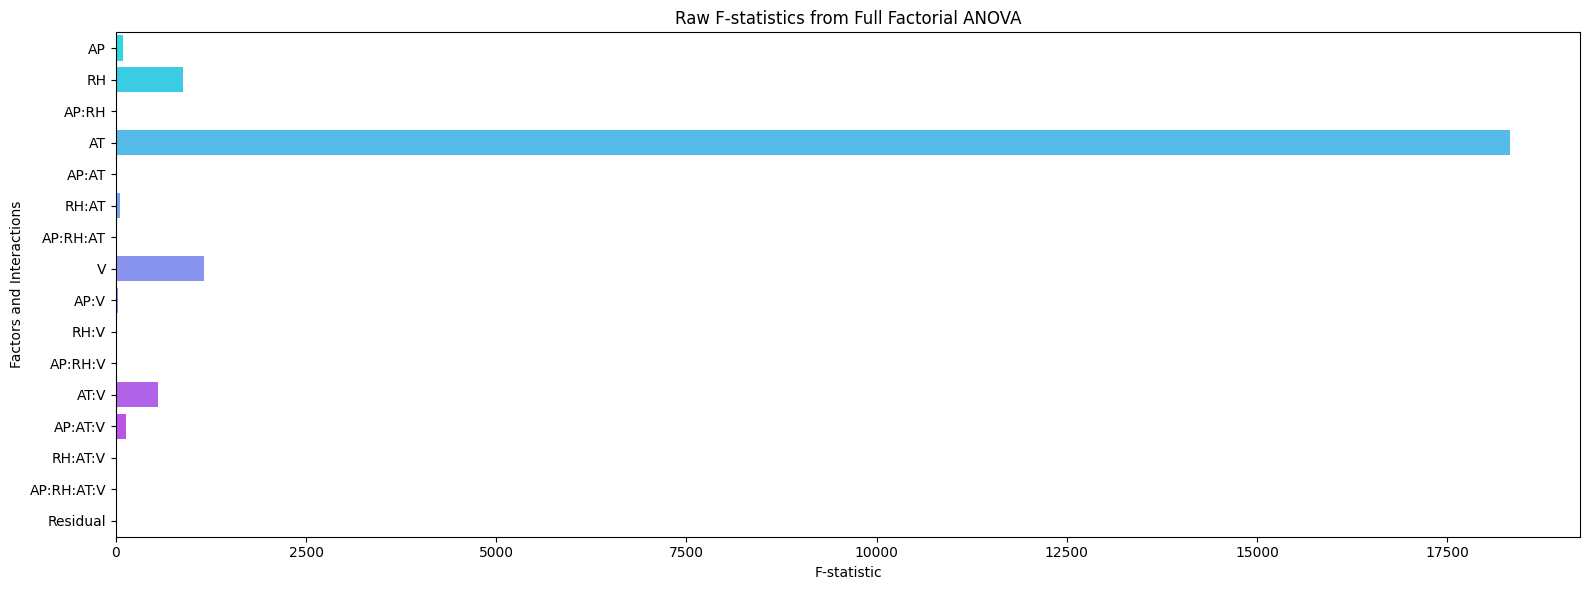

C:\Users\DARiN\AppData\Local\Temp\ipykernel_21360\3007579474.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p_value', y='Factor', data=anova_results, palette='coolwarm')


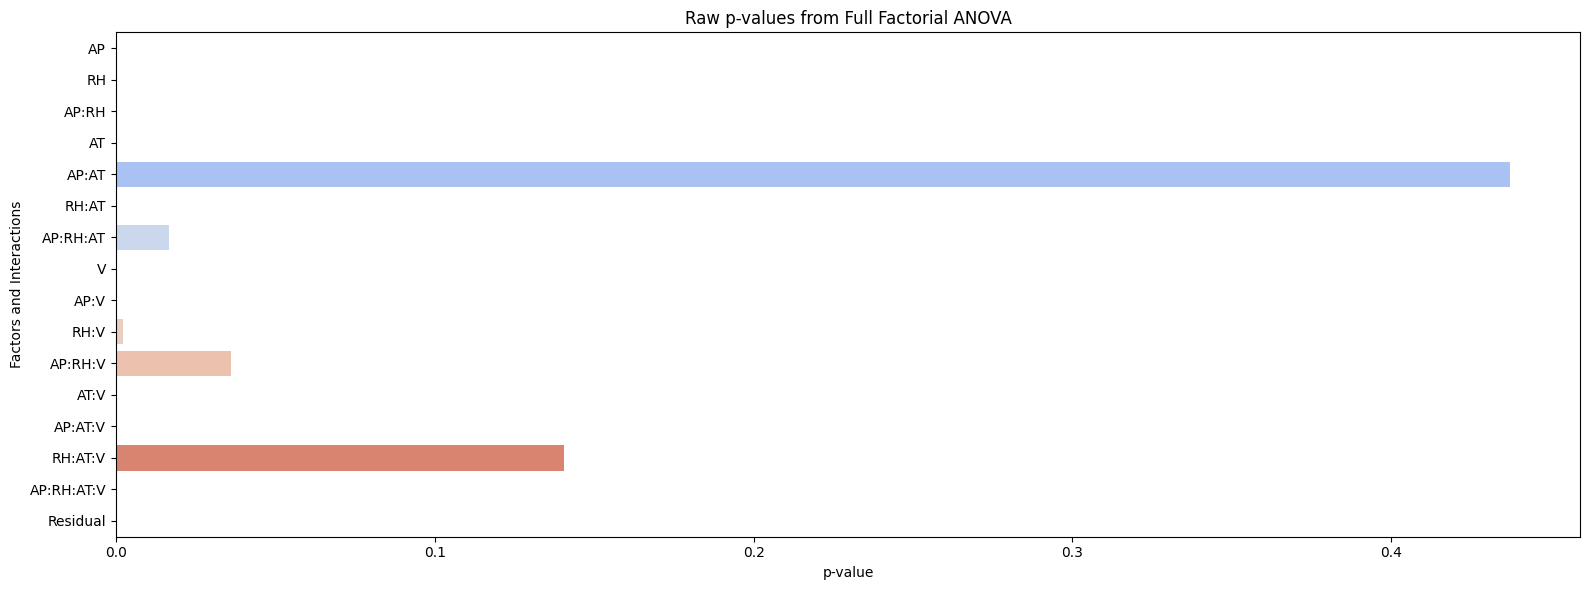

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns AP, RH, AT, V, and PE

# Fit the full factorial model
formula = 'PE ~ AP * RH * AT * V'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the F-statistic values and p-values
anova_results = anova_table[['F', 'PR(>F)']].reset_index()
anova_results.columns = ['Factor', 'F_statistic', 'p_value']

# Plot raw F-statistics in a wider figure
plt.figure(figsize=(16, 6))
sns.barplot(x='F_statistic', y='Factor', data=anova_results, palette='cool')
plt.title("Raw F-statistics from Full Factorial ANOVA")
plt.xlabel("F-statistic")
plt.ylabel("Factors and Interactions")
plt.tight_layout()
plt.show()

# Plot raw p-values in a separate, wider figure
plt.figure(figsize=(16, 6))
sns.barplot(x='p_value', y='Factor', data=anova_results, palette='coolwarm')
plt.title("Raw p-values from Full Factorial ANOVA")
plt.xlabel("p-value")
plt.ylabel("Factors and Interactions")
plt.tight_layout()
plt.show()

C:\Users\DARiN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DARiN\AppData\Local\Temp\ipykernel_21360\3018881550.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='log_F_statistic', y='Factor', data=anova_results, palette='cool')


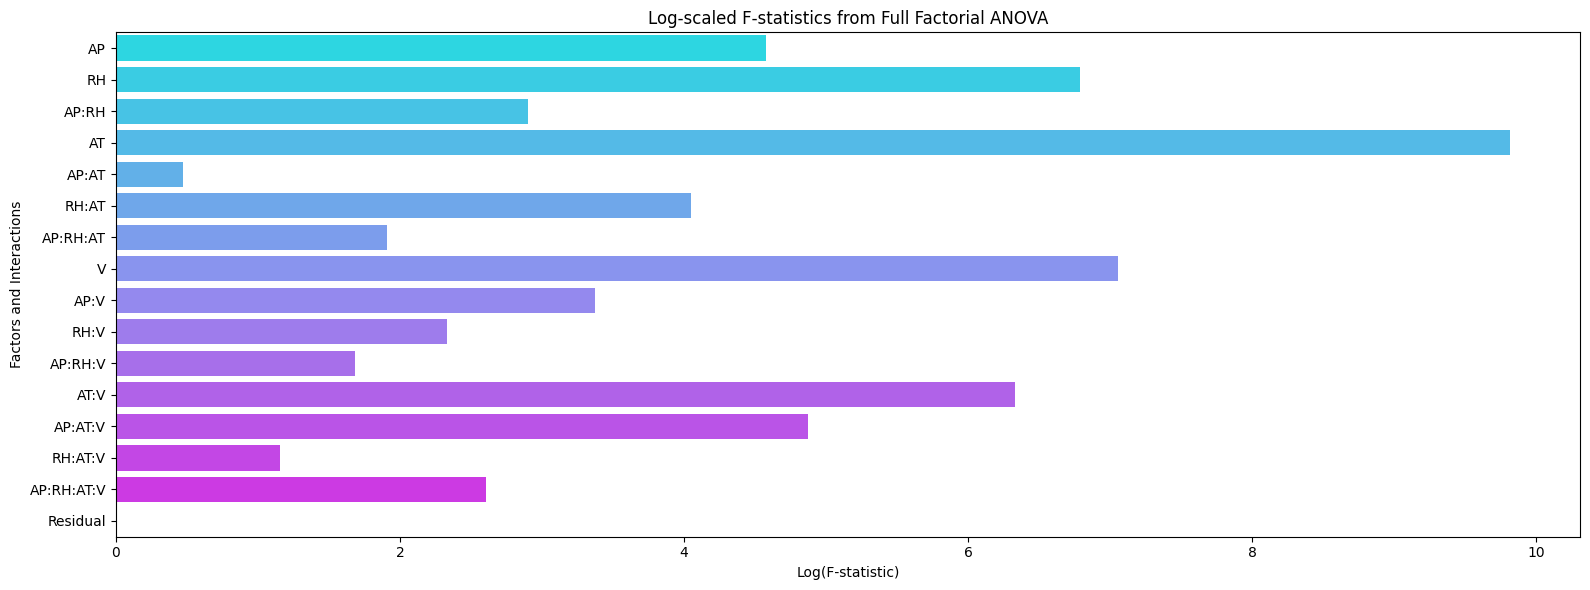

C:\Users\DARiN\AppData\Local\Temp\ipykernel_21360\3018881550.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neg_log_p_value', y='Factor', data=anova_results, palette='coolwarm')


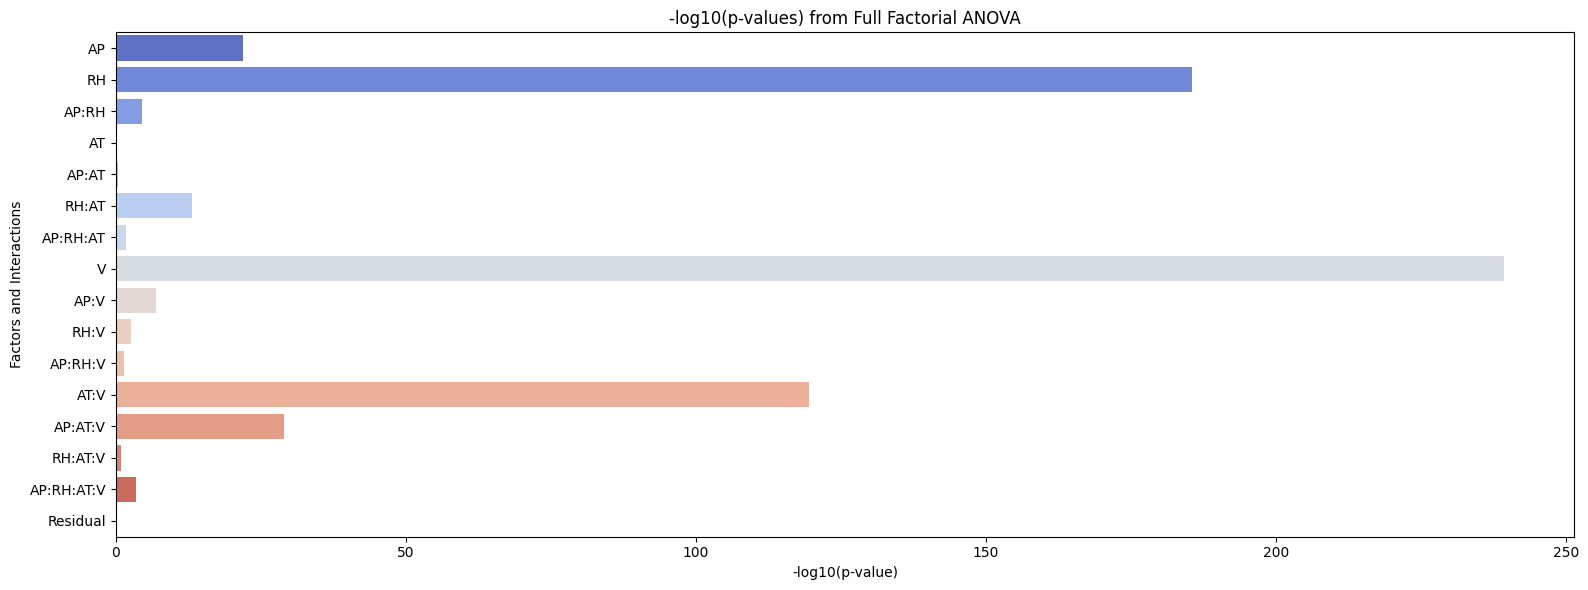

In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and it contains columns AP, RH, AT, V, and PE

# Fit the full factorial model
formula = 'PE ~ AP * RH * AT * V'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the F-statistic values and p-values
anova_results = anova_table[['F', 'PR(>F)']].reset_index()
anova_results.columns = ['Factor', 'F_statistic', 'p_value']

# Apply log transformations
anova_results['log_F_statistic'] = np.log1p(anova_results['F_statistic'])  # Log scale for F-statistic
anova_results['neg_log_p_value'] = -np.log10(anova_results['p_value'])  # Log scale for p-value

# Plot log-scaled F-statistics in a wider figure
plt.figure(figsize=(16, 6))
sns.barplot(x='log_F_statistic', y='Factor', data=anova_results, palette='cool')
plt.title("Log-scaled F-statistics from Full Factorial ANOVA")
plt.xlabel("Log(F-statistic)")
plt.ylabel("Factors and Interactions")
plt.tight_layout()
plt.show()

# Plot -log10(p-values) in a separate, wider figure
plt.figure(figsize=(16, 6))
sns.barplot(x='neg_log_p_value', y='Factor', data=anova_results, palette='coolwarm')
plt.title("-log10(p-values) from Full Factorial ANOVA")
plt.xlabel("-log10(p-value)")
plt.ylabel("Factors and Interactions")
plt.tight_layout()
plt.show()

## High log10 p value = lower raw p vale (greater significance)
## missing bar graphs for AT and AP:AT

### Risk groups = high p values > 0.05
### AP:AT and RH:AT:V

Higher bars on the plot (larger values of -log10(p-value)) indicate smaller p-values, which means higher significance.

Lower bars (closer to 0) mean larger p-values, which indicate lower significance.

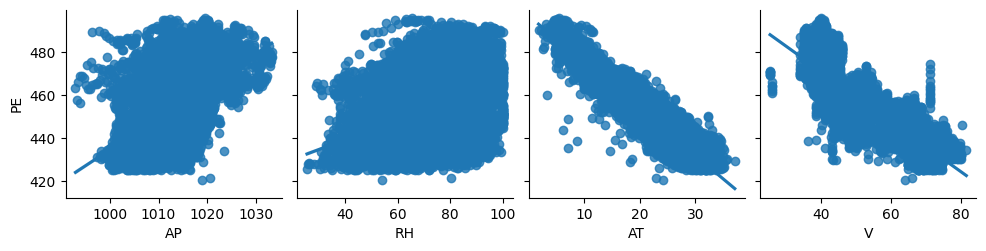

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plots to check linearity between each feature and the target (PE)
sns.pairplot(df, x_vars=['AP', 'RH', 'AT', 'V'], y_vars='PE', kind='reg')
plt.show()

(a) Boxplots for visualizing outliers:

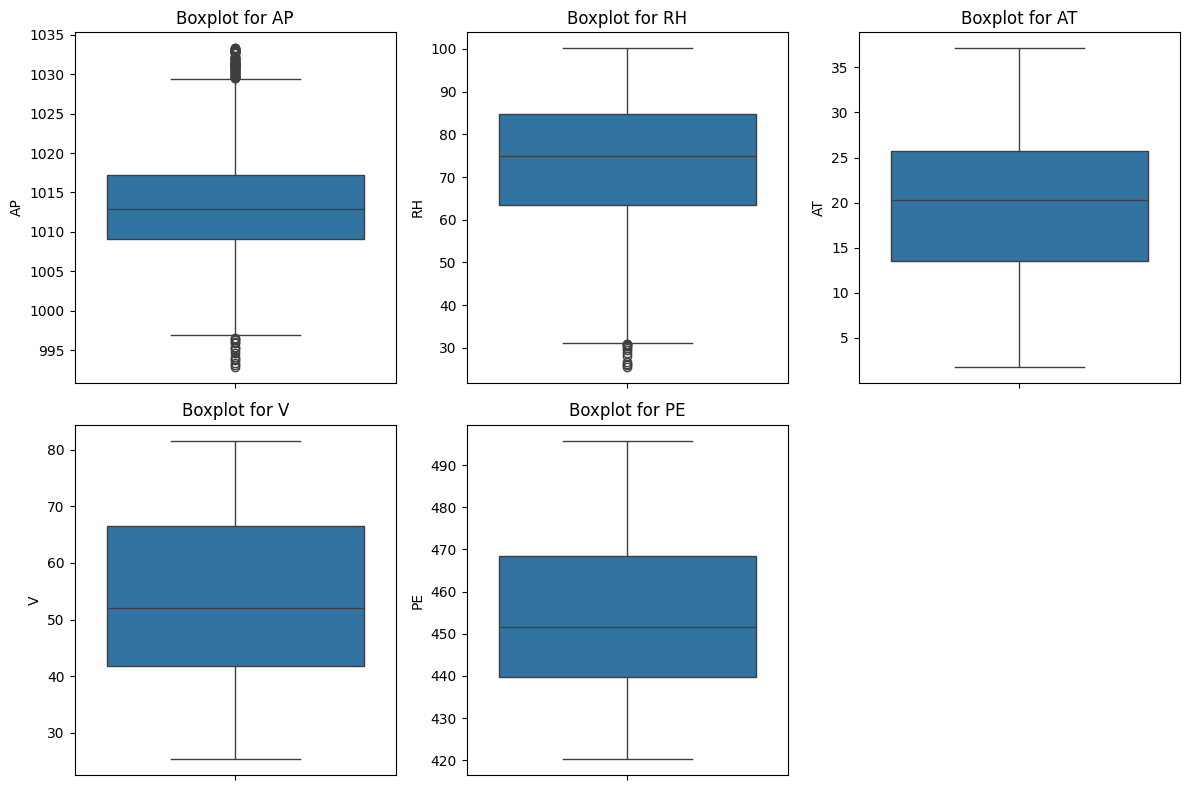

In [6]:
# Create boxplots for each feature variable
#try multiple side by side boxplots?
features = ['AP', 'RH', 'AT', 'V', 'PE']
plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

 (b) Z-scores for detecting outliers numerically:

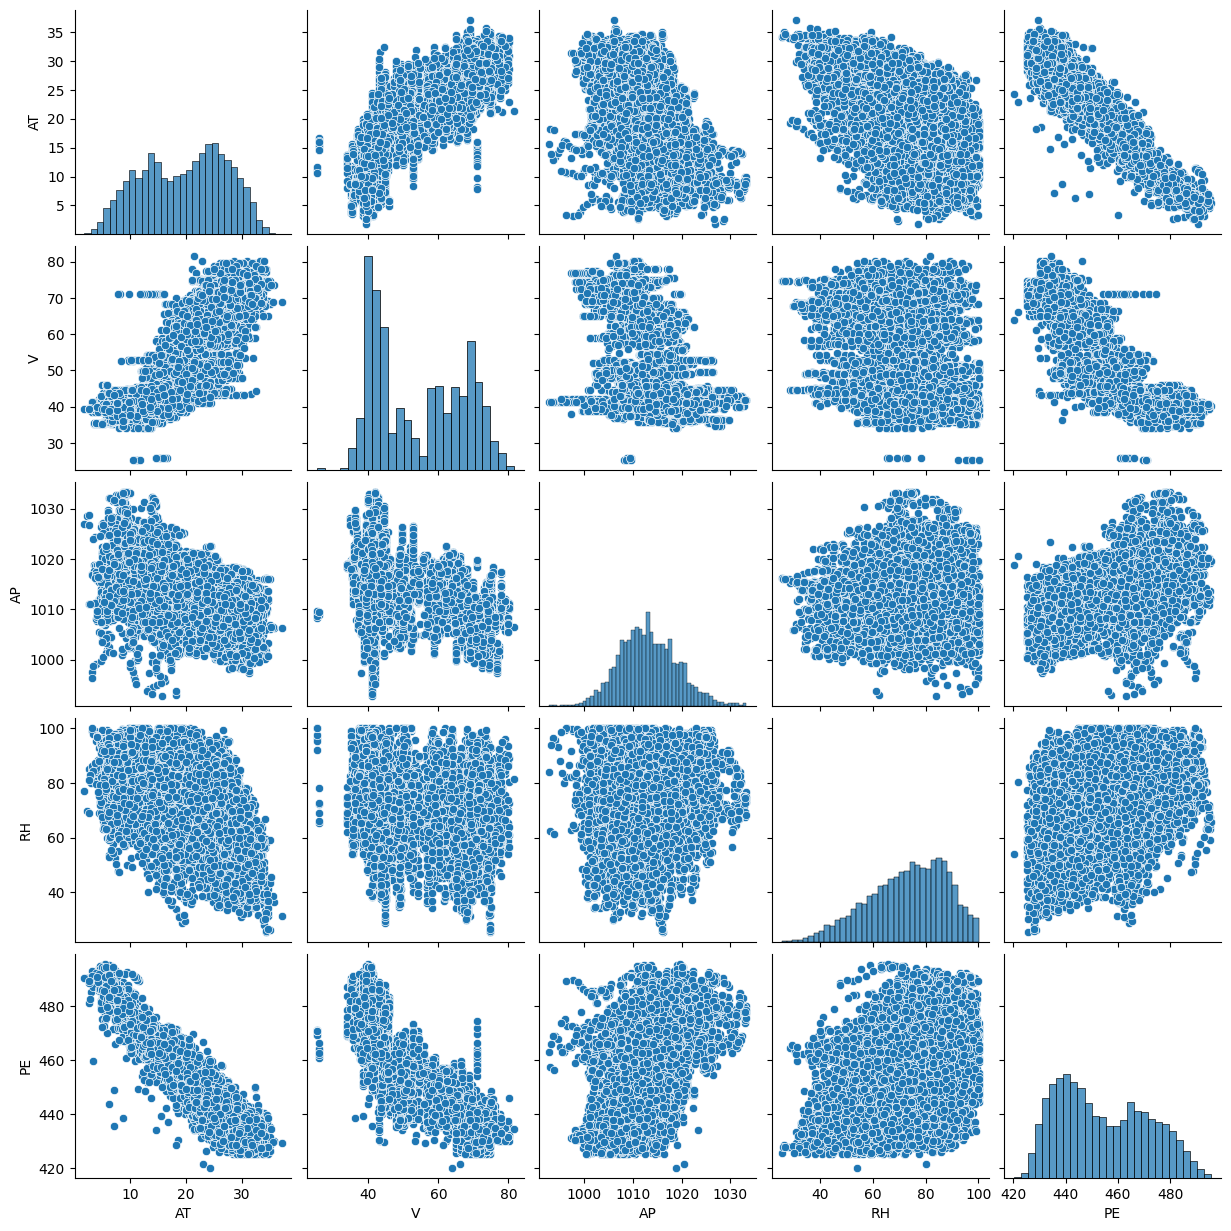

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot to check relationships
sns.pairplot(df)
plt.show()

In [15]:
from scipy.stats import zscore

# Calculate Z-scores for each feature and target variable
df_z = df[['AP', 'RH', 'AT', 'V', 'PE']].apply(zscore)

# Combine original data with Z-scores
df_combined = df[['AP', 'RH', 'AT', 'V', 'PE']].copy()
for col in df_combined.columns:
    df_combined[f'{col}_Z'] = df_z[col]

# Identify outliers (absolute Z-score > 3)
outliers = (df_z.abs() > 3).any(axis=1)

# Show rows with outliers, including Z-scores
df_outliers = df_combined[outliers]
# print("Outliers detected with Z-scores:")
# print(df_outliers)

In [14]:
# Without outliers (absolute Z-score <= 3)
df_z = df[['AP', 'RH', 'AT', 'V', 'PE']].apply(zscore)
no_outliers = df[(df_z.abs() <= 3).all(axis=1)]

# Compare summary statistics
print("Original Data:")
print(df.describe())

print("\nWithout Outliers:")
print(no_outliers.describe())

Original Data:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

Without Outliers:
                AT            V           AP           RH           PE
count  9510.000000  9510.000000  9510.000000  9510.000000  9510.000000
mean     19.692802    54.366760  1013.192105    73.324603   454.269644
std       7.433565    12.701365     5.792225    14.575318    17.037027
min       1.810000    25.360000   995.45000

## removing outliers = only small effect to mean or std dev

Use clustering techniques (like K-means) to identify whether outliers form distinct clusters. 

If they do, it suggests the outliers might be valid data points, representing a separate class.

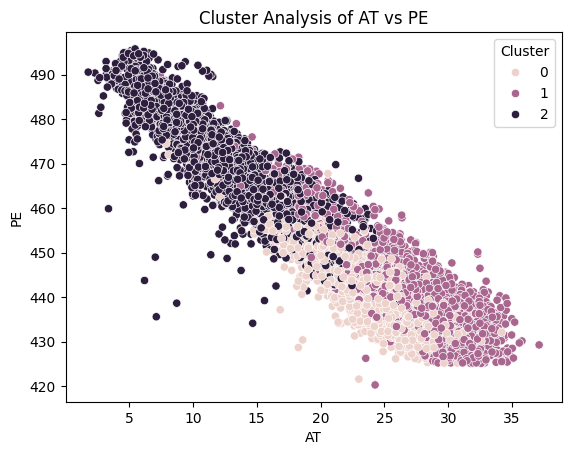

In [67]:
from sklearn.cluster import KMeans

indep = 'AT'


# Perform K-means clustering (k=3 as an example)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['AP', 'RH', 'AT', 'V']])

# Visualize clusters
sns.scatterplot(x=indep, y='PE', hue='Cluster', data=df)
plt.title(f'Cluster Analysis of {indep} vs PE')
plt.show()

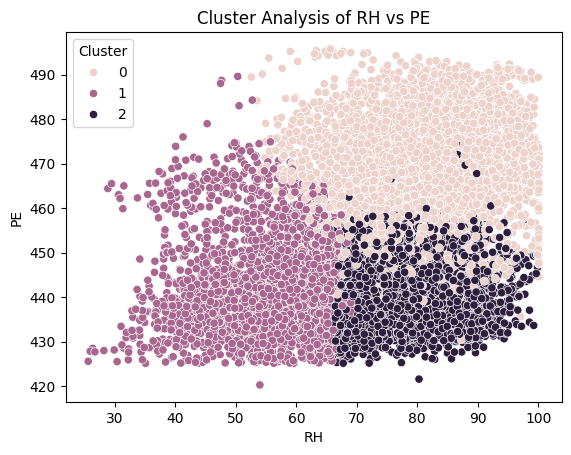

In [66]:
from sklearn.cluster import KMeans

indep = 'RH'


# Perform K-means clustering (k=3 as an example)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['AP', 'RH', 'AT', 'V']])

# Visualize clusters
sns.scatterplot(x=indep, y='PE', hue='Cluster', data=df)
plt.title(f'Cluster Analysis of {indep} vs PE')
plt.show()

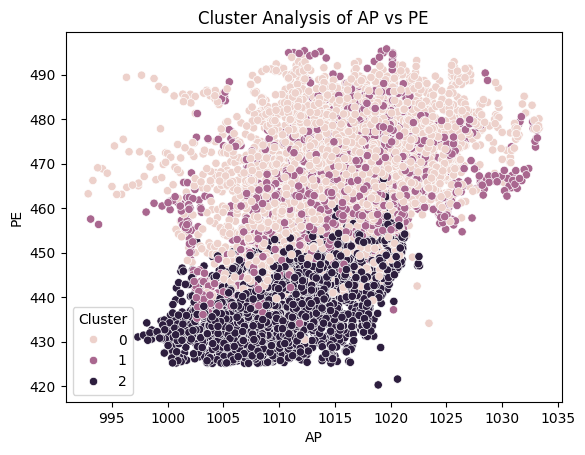

In [64]:
from sklearn.cluster import KMeans

indep = 'AP'


# Perform K-means clustering (k=3 as an example)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['AP', 'RH', 'AT', 'V']])

# Visualize clusters
sns.scatterplot(x=indep, y='PE', hue='Cluster', data=df)
plt.title(f'Cluster Analysis of {indep} vs PE')
plt.show()

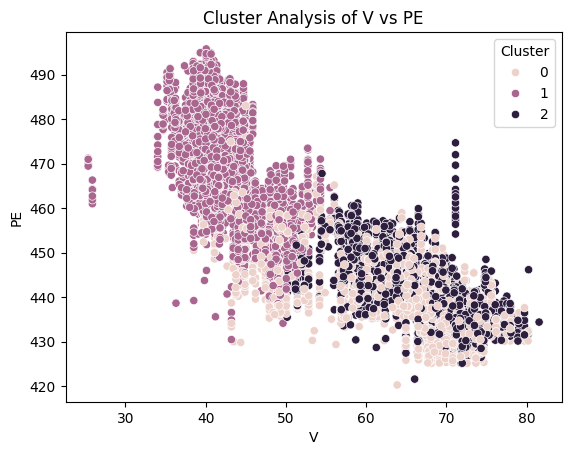

In [68]:
from sklearn.cluster import KMeans

indep = 'V'


# Perform K-means clustering (k=3 as an example)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['AP', 'RH', 'AT', 'V']])

# Visualize clusters
sns.scatterplot(x=indep, y='PE', hue='Cluster', data=df)
plt.title(f'Cluster Analysis of {indep} vs PE')
plt.show()

## Well-separated clusters indicate that the features are discriminating the data well.
## Better separation = Algorithim will be better at finding boundaries in a model.
## Risk groups, AP and V

In [55]:
# Calculate mean of features for each cluster
cluster_summary = df.groupby('Cluster')[['AT', 'PE']].mean()
print(cluster_summary)

                AT          PE
Cluster                       
0        23.778450  441.604408
1        26.371870  442.438560
2        12.903764  469.681923


## T-test:
#### more suitable when comparing means of 2 groups
####  The t-statistic measures the difference between group means relative to the variability within the groups.

In [25]:
import pandas as pd
from scipy import stats
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df['AT'], df['PE'])

# Display the results
print(f'T-statistic: {t_statistic}, p-value: {p_value:.4f}')

T-statistic: -1753.5653812864073, p-value: 0.0000


In [26]:
import pandas as pd
from scipy import stats
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df['AP'], df['PE'])

# Display the results
print(f'T-statistic: {t_statistic}, p-value: {p_value:.4f}')

T-statistic: 3673.6176804462775, p-value: 0.0000


In [27]:
import pandas as pd
from scipy import stats
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df['V'], df['PE'])

# Display the results
print(f'T-statistic: {t_statistic}, p-value: {p_value:.4f}')

T-statistic: -1358.2525295219396, p-value: 0.0000


In [28]:
import pandas as pd
from scipy import stats
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(df['RH'], df['PE'])

# Display the results
print(f'T-statistic: {t_statistic}, p-value: {p_value:.4f}')

T-statistic: -2116.3395262690497, p-value: 0.0000


In general, the larger the absolute value of the t-statistic, the stronger the evidence against the null hypothesis (which posits that there is no difference between the means).

If the p-value is significantly low (commonly less than 0.05), you can reject the null hypothesis, concluding that there is a statistically significant difference between the two means.